<a href="https://colab.research.google.com/github/abhinavgairola/Anomaly_Detection_OTC_Market/blob/main/Read_parquet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [179]:
!pip install --upgrade plotly

Requirement already up-to-date: plotly in /usr/local/lib/python3.7/dist-packages (4.14.3)


In [180]:
!pip install mplfinance

In [181]:
import pandas_datareader as pdr
import pandas as pd
import datetime
import matplotlib.pyplot as mp
import string
mp.style.use('ggplot')
import requests
import numpy as np
from bs4 import BeautifulSoup
import re
import json
from google.colab import drive
drive.mount('/content/drive')
import csv
import pyarrow as pa
import json
from sklearn import preprocessing
import calendar
from termcolor import colored
import seaborn as sns
import plotly.express as px
import mplfinance as mpf
import matplotlib.font_manager
mp.style.use('dark_background')
mp.rcParams["font.family"] = "Times New Roman"
cm = sns.light_palette("green", as_cmap=True)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [182]:
dir(mpf)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_arg_validators',
 '_helpers',
 '_mpf_warnings',
 '_mplwraps',
 '_panels',
 '_styledata',
 '_styles',
 '_utils',
 '_version',
 '_widths',
 'available_styles',
 'figure',
 'make_addplot',
 'make_marketcolors',
 'make_mpf_style',
 'mplfinance',
 'plot',
 'plotting',
 'show',
 'write_style_file']

In [183]:
help(mpf.make_addplot)

Help on function make_addplot in module mplfinance.plotting:

make_addplot(data, **kwargs)
    Take data (pd.Series, pd.DataFrame, np.ndarray of floats, list of floats), and
    kwargs (see valid_addplot_kwargs_table) and construct a correctly structured dict
    to be passed into plot() using kwarg `addplot`.  
    NOTE WELL: len(data) here must match the len(data) passed into plot()



In [184]:
help(mpf.make_marketcolors)

Help on function make_marketcolors in module mplfinance._styles:

make_marketcolors(**kwargs)
    Create a 'marketcolors' dict that is structured as expected
    by mplfinance._styles code:
        up     = color for close >= open
        down   = color for close  < open
        edge   = color for edge of candlestick; if "inherit"
                 then edge color will be same as up or down.
        wick   = color for wick of candlestick; if "inherit"
                 then wick color will be same as up or down.
        alpha  = opacity, 0.0 to 1.0, of candlestick face.
        ohlc   = color of ohlc bars when all the same color;
                 if ohlc == "inherit" then use up/down colors.
        volume = color of volume bars when all the same color;
                 if volume == "inherit" then use up/down colors.



##Read the stocks data from the Parquet file

In [185]:
df_stocks = pd.read_parquet('/content/drive/MyDrive/OTCMKT/Stocks_data_3.parquet.gzip')


In [186]:
### Compute daily average using open, close, high, low and adjusted close price.
df_daily_average=(df_stocks['Open']+df_stocks['Close']+df_stocks['High']+df_stocks['Low'])/4

In [187]:
### Filter the columns where tghe NaN is less than 50%
df_daily_average = df_daily_average[df_daily_average.columns[df_daily_average.isnull().mean()<=0.5]].fillna(0)

In [188]:
df_daily_average.index.date

array([datetime.date(2016, 1, 4), datetime.date(2016, 1, 5),
       datetime.date(2016, 1, 6), ..., datetime.date(2021, 4, 9),
       datetime.date(2021, 4, 12), datetime.date(2021, 4, 13)],
      dtype=object)

## Read the tweet data from the json file and bring it to shape

In [189]:
#with open('/content/drive/MyDrive/OTCMKT/All_tweets_with_emojis_with_punctuations.json','r') as f:
#  data = (json.load(f))

   

In [190]:
#test = pd.DataFrame.from_dict(data, orient='index')

In [191]:

#test

In [192]:
#test = test.T

In [193]:
#columns = test.columns.str.startswith('Date')
#columns_2 = test.columns.str.startswith('Tweets')
#columns = test.columns[columns]
#test.melt(id_vars=list(columns),value_vars=list(test.columns[columns_2]))

In [194]:
#df = pd.DataFrame.from_dict(data, orient='index')
#print(df)
## This I am doing it to bring it to proper shape.
#Dates = []
#Tweets = []
#Ticker  = []
#for key, vals in data.items():
#  if key.find('Date')>-1:
#    Dates = Dates+vals
#  elif key.find('Tweets')>-1:
#    Tweets = Tweets+vals
#    Ticker = Ticker + [key.split('Tweets')[1]]*len(vals)
#df_tweets = pd.DataFrame({'Dates':Dates,'Tweets':Tweets,'Ticker':Ticker})

In [195]:
## Convert dates column to datetime index
#df_tweets['Dates'] = pd.to_datetime(df_tweets['Dates'])
#df_tweets.set_index('Dates')[['Ticker','Tweets']].to_parquet('/content/drive/MyDrive/OTCMKT/All_tweets_correct_format.parquet.gzip',
#              compression='gzip')
df_tweets = pd.read_parquet('/content/drive/MyDrive/OTCMKT/All_tweets_correct_format.parquet.gzip')

In [196]:
df_tweets = df_tweets.reset_index()#.set_index('Dates')[['Ticker','Tweets']]
df_tweets.rename(columns={'Dates':'Date'},inplace=True)

In [197]:
Available_ticks = list(df_daily_average.columns)
Available_ticks

['RGBP',
 'HCMC',
 'DRNK',
 'FTEG',
 'INCT',
 'BDGR',
 'WWIO',
 'NUUU',
 'AZFL',
 'CBYI',
 'PHIL',
 'GDET',
 'GNCP',
 'ECEZ',
 'HAON',
 'FTXP',
 'MMEX',
 'IRNC',
 'GTEH',
 'INND',
 'ONCI',
 'KYNC',
 'LTNC',
 'INCC',
 'SVTE',
 'IMTL',
 'PLPL',
 'EFIR',
 'MLHC',
 'ABVG',
 'CBDL',
 'TBEV',
 'MDCN',
 'VIBI',
 'GRLT',
 'GTLL',
 'UVSE',
 'AMLH',
 'FOYJ',
 'FERN',
 'SIML',
 'TMGI',
 'GGII',
 'BEHL',
 'USEI',
 'SANP',
 'BLSP',
 'TGRO',
 'BOTY',
 'SUTI',
 'WNBD',
 'AITX',
 'MRNJ',
 'PRPM',
 'FCGD',
 'ILST',
 'AHFD',
 'ETFM',
 'PRMO',
 'TGGI',
 'IGEX',
 'ECOS',
 'ADGO',
 'SPQS',
 'PLYZ',
 'FBCD',
 'ADTM',
 'SNRS',
 'NWGC',
 'ENTI',
 'TWOH',
 'PBHG',
 'APPZ',
 'KGET',
 'MINE',
 'UBQU',
 'MTVX',
 'SEEK',
 'SDVI',
 'TPAC',
 'RCHA',
 'ICNM',
 'PYCT',
 'RMRK',
 'APYP',
 'VPER',
 'COWI',
 'BBRW',
 'ICBU',
 'HQGE',
 'BUNM',
 'MSPC',
 'PDMI',
 'HPIL',
 'AAGC',
 'HBRM',
 'USMJ',
 'IHSI',
 'HPNN',
 'WDLF',
 'AFOM',
 'ETEK',
 'HVCW',
 'DSCR',
 'BSSP',
 'PVSP',
 'MAXD',
 'MDIN',
 'PVDG',
 'BLUU',
 'RMTD',
 

In [198]:
df_tweets=df_tweets[df_tweets.Ticker.isin(Available_ticks)]

In [199]:
bar_plot_data = pd.DataFrame(df_tweets.set_index('Date').groupby('Ticker')['Tweets'].count()).reset_index().sort_values(by='Tweets',ascending=True).rename(columns={'Tweets':'Counts'})

In [200]:
list(bar_plot_data.tail(20).Ticker.values)

['OZSC',
 'WDLF',
 'SPOM',
 'AZFL',
 'NWBO',
 'SFOR',
 'MJNA',
 'SBES',
 'TTCM',
 'HMNY',
 'ANDI',
 'TRTC',
 'LTNC',
 'FNMA',
 'HCMC',
 'GBTC',
 'MINE',
 'DIRV',
 'ENZC',
 'OPTI']

In [201]:
mpf.available_styles()

['binance',
 'blueskies',
 'brasil',
 'charles',
 'checkers',
 'classic',
 'default',
 'ibd',
 'kenan',
 'mike',
 'nightclouds',
 'sas',
 'starsandstripes',
 'yahoo']

In [202]:
TICKER_to_plot = 'OPTI'
Candle_stick=pd.DataFrame(index=df_stocks[('Adj Close')][TICKER_to_plot].index,data={'Open':df_stocks[('Open')][TICKER_to_plot].values,'Close':df_stocks[('Close')][TICKER_to_plot].values,'High':df_stocks[('High')][TICKER_to_plot].values,'Low':df_stocks[('Low')][TICKER_to_plot].values,'Volume':df_stocks[('Volume')][TICKER_to_plot].values})

In [203]:
period = 20 
multiplier = 2
Candle_stick['UpperBand'] = Candle_stick['Close'].rolling(period).mean() + Candle_stick['Close'].rolling(period).std() * multiplier
Candle_stick['LowerBand'] = Candle_stick['Close'].rolling(period).mean() - Candle_stick['Close'].rolling(period).std() * multiplier

In [204]:
Candle_stick

,Open,Close,High,Low,Volume,UpperBand,LowerBand
Date,,,,,,,
2016-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2021-04-07,0.1550,0.1360,0.1600,0.13520,11971581.0,0.177288,0.100991
2021-04-08,0.1350,0.1310,0.1450,0.12197,16413581.0,0.176596,0.100223
2021-04-09,0.1315,0.1290,0.1340,0.11850,11508660.0,0.173843,0.099870


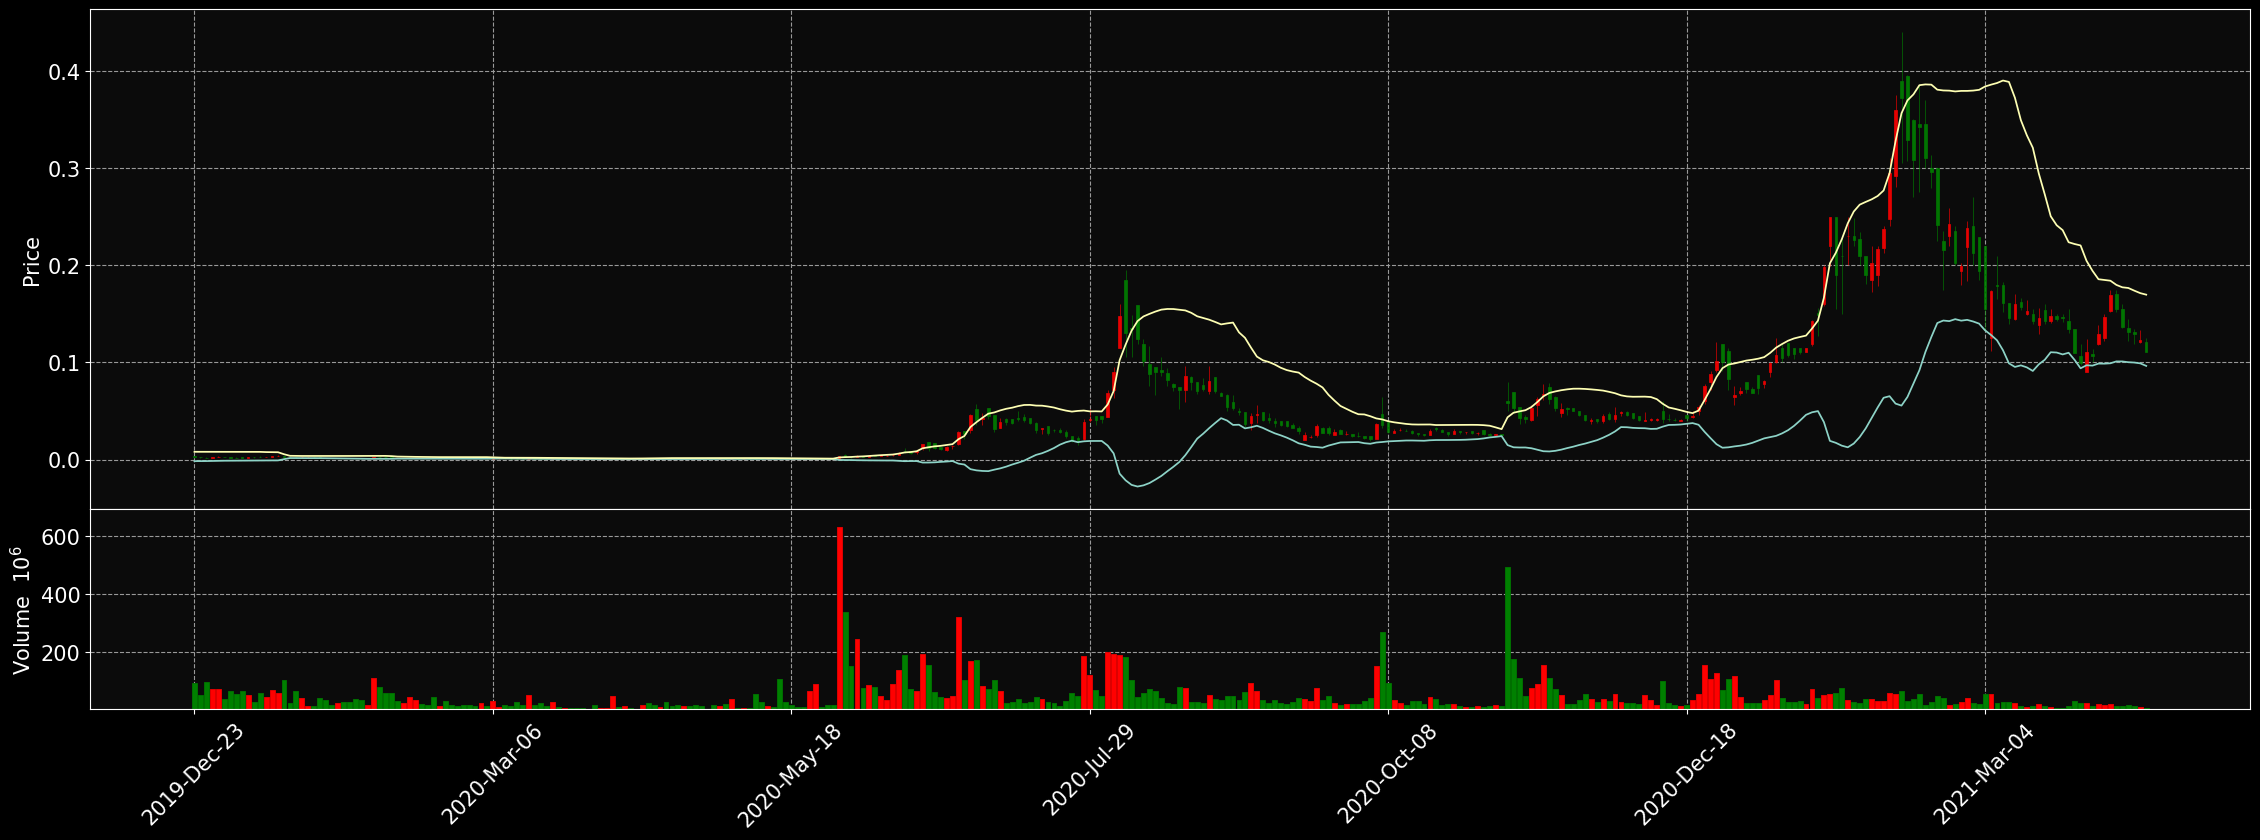

In [205]:
tcdf = Candle_stick[['LowerBand','UpperBand']]  
apd  = mpf.make_addplot(tcdf.iloc[1000:1400,:])
mc = mpf.make_marketcolors(up='#FF0000',down='#008000',inherit=True)
s  = mpf.make_mpf_style(base_mpf_style='nightclouds',marketcolors=mc)
mpf.plot(Candle_stick.iloc[1000:1400,:], type='candle',figsize=(30,10),addplot=apd,volume=True,fontscale=1.5,style=s)


##[Candle stick]((https://en.wikipedia.org/wiki/Candlestick_chart)) chart showing the [Bollinger bands](https://www.fidelity.com/learning-center/trading-investing/technical-analysis/technical-indicator-guide/bollinger-bands#:~:text=Bollinger%20Bands%20are%20envelopes%20plotted,Period%20and%20Standard%20Deviations%2C%20StdDev.) together with the Open, Close, High and Low at each day and the volume of the traded stock (ticker name:UBQU). More can be learned from [here](https://finance.yahoo.com/news/read-candle-chart-190000711.html). Some interesting patterns like [bullish engulfing](https://www.dailyfx.com/education/candlestick-patterns/bullish-engulfing.html) can be checked from here too.

In [206]:
bar_plot_2 = pd.DataFrame(df_tweets.groupby(['Date','Ticker'])['Tweets'].count())
#bar_plot_2[bar_plot_2.Ticker=='ABQQ']
pd.DataFrame(df_tweets.set_index('Date').groupby('Ticker')['Tweets'].count()).reset_index().sort_values(by='Tweets',ascending=True).rename(columns={'Tweets':'Counts'})

,Ticker,Counts
886,WWNG,8
734,SNYL,10
883,WTRO,11
336,GPKE,13
84,BFLD,16
...,...,...
306,GBTC,95739
509,MINE,97953
195,DIRV,102652
249,ENZC,112244


In [207]:
#df_tweets[df_tweets.Ticker =='UBQU']
bar_plot_2 = bar_plot_2.reset_index()
UBQU = bar_plot_2[bar_plot_2.sort_values(by='Ticker',ascending=False).Ticker == 'UBQU']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [208]:
UBQU['Date'].filter(items=list(UBQU.Date.values[0:10]))

Series([], Name: Date, dtype: datetime64[ns])

In [209]:
UBQU=UBQU.rename(columns={'Tweets':'Counts'})

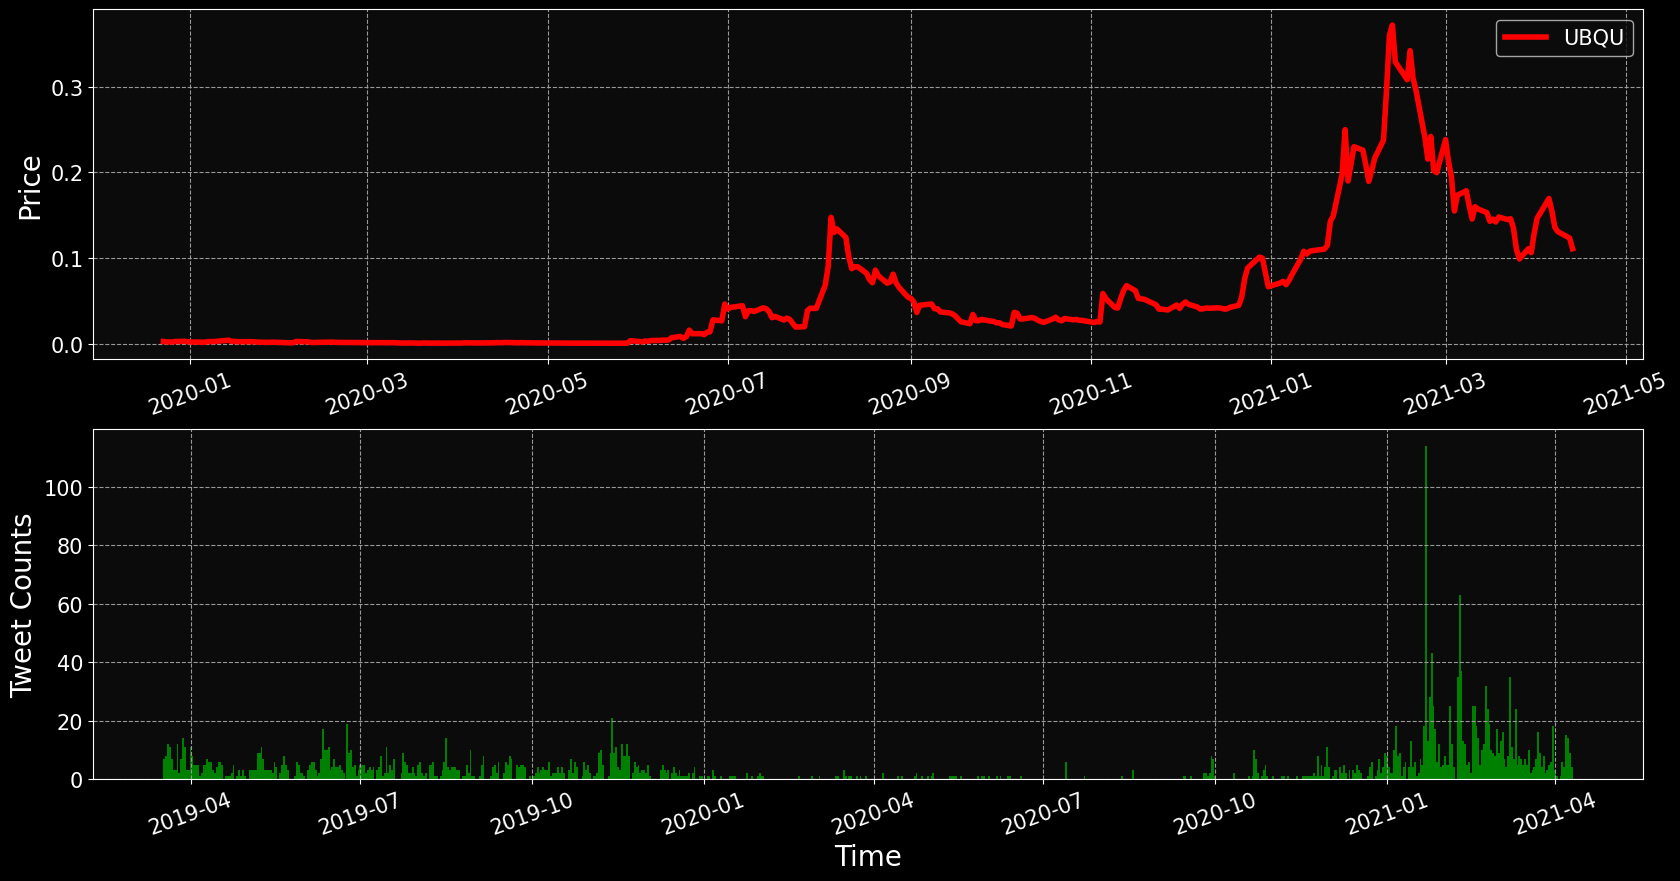

In [210]:

x =UBQU['Date']
y= UBQU['Counts']
fig, ax = mp.subplots(2,1,figsize=(20,10))
ax[0].plot(Candle_stick.index[1000:2400], Candle_stick['Close'][1000:2400],color='red',linewidth=4,label='UBQU')
mp.setp(ax[1].get_xticklabels(), rotation=20)
mp.setp(ax[0].get_xticklabels(), rotation=20)
ax[1].bar(x[1000:2400],y[1000:2400],color='green',width=1.0)
ax[1].set_xlabel('Time',fontsize=20)
ax[1].set_ylabel('Tweet Counts',fontsize=20)
ax[0].set_ylabel('Price',fontsize=20)
ax[0].legend(loc='best')

In [211]:
help(mpf.plot)

Help on function plot in module mplfinance.plotting:

plot(data, **kwargs)
    Given a Pandas DataFrame containing columns Open,High,Low,Close and optionally Volume
    with a DatetimeIndex, plot the data.
    Available plots include ohlc bars, candlestick, and line plots.
    Also provide visually analysis in the form of common technical studies, such as:
    moving averages, renko, etc.
    Also provide ability to plot trading signals, and/or addtional user-defined data.



In [212]:
bar_plot_2 = bar_plot_2.sort_values(by='Tweets').tail(1000)

In [213]:
bar_plot_2

,Date,Ticker,Tweets
88428,2017-04-03,MMEX,546
21791,2016-04-17,HVCW,546
68153,2016-12-27,UBQU,546
538188,2021-02-03,FTEG,547
446138,2020-07-13,OPTI,547
...,...,...,...
537533,2021-02-02,HCMC,3691
20672,2016-04-12,ECEZ,3746
541583,2021-02-08,HCMC,4684
551938,2021-02-23,ANDI,5301


In [214]:
fig = px.treemap(bar_plot_2, path=['Ticker', 'Date'], values='Tweets',color='Ticker',color_continuous_scale=px.colors.sequential.RdBu)
fig.update_layout(font=dict(family="Times New Roman",
        size=18,
        color="white"),plot_bgcolor='rgba(0,0,0,1)',paper_bgcolor= 'rgba(0, 0, 0, 1)')
fig.show()


## The above plots represents the heirarchical information about the tickers--there tickers inside which the dates are listed while the tweet counts represent the size of each date box. Clearly HCMC and ENZC are tweeted many times across multiple dates. It might happen later that these are the most severly pumped OTC market stocks.

In [215]:
fig_1 = px.bar(bar_plot_data.tail(50), x='Counts', y='Ticker',orientation='h',labels=dict(x="Counts", y="Keywords"),color='Counts',color_continuous_scale=px.colors.sequential.Reds)
fig_1.update_layout(font=dict(family="Times New Roman",size=18,color="white"),plot_bgcolor='rgba(0,0,0,1)',paper_bgcolor= 'rgba(0, 0, 0, 1)')
fig_1.show()

## Tweets and their counts are shown in the above plot

In [460]:
columns_list_of_stocks = list(bar_plot_data.tail(1000).Ticker.values)
stocks_to_track = 600

In [461]:
## loc doesn't support list with missing values anymore using filter method.
#df_daily_average['XTRM'].filter(items=time_list_unique).plot(figsize=(20,10))
#columns_list_of_stocks = sorted(columns_list_of_stocks)[::-1]

In [462]:

df_daily_average_copy = df_daily_average.copy()


def mean_std(Ticker_name,dataframe):

  """
  The utility of this method is 
  1) Select those days where the tweet counts is > 100.
  2) Compute the 20 days backward average as mentioned in this work:-https://qspace.library.queensu.ca/bitstream/handle/1974/28239/David_Nam_K_202010_MSC.pdf?sequence=2&isAllowed=y
  3) Compute the standard deviation too on the same time scale
  """

  time_delta = datetime.timedelta(1)

  df_daily_average_copy = dataframe.copy()
  
  ## select those days where the tweet counts is > 100
  time_list = list(df_tweets[df_tweets['Ticker'] == Ticker_name].groupby('Date')['Tweets'].count()[df_tweets[df_tweets['Ticker'] == Ticker_name].groupby('Date')['Tweets'].count().apply(lambda x: x>=100)].index)#list((df_tweets[df_tweets['Ticker'] == Ticker_name]['Dates']))
  
  #print(df_tweets[df_tweets['Ticker'] == Ticker_name].groupby('Date')['Tweets'].count()[df_tweets[df_tweets['Ticker'] == Ticker_name].groupby('Date')['Tweets'].count().apply(lambda x: x>=100)])
  time_list_unique=(time_list)#list(pd.to_datetime((df_tweets[df_tweets['Ticker'] == Ticker_name]['Dates'].unique())))

  #print(time_list_unique)
  date = []
  Data_mean = []
  Data_std = []
  
  for time in time_list_unique[::-1]:

    filtering = [time-i*time_delta for i in range(1,20) if calendar.day_name[(time-i*time_delta).weekday()] in ['Monday','Tuesday','Wednesday','Thursday','Friday'] ]
    date.append(time)
    Data_mean.append(df_daily_average_copy[Ticker_name].filter(items=filtering).dropna().mean())
    Data_std.append(df_daily_average_copy[Ticker_name].filter(items=filtering).dropna().std())

  return pd.DataFrame({'Date':date,'Mean_'+Ticker_name:Data_mean,'Std_'+Ticker_name:Data_std}).set_index('Date')


## Loop through the tickers and merge the above computation to the copy of the stock dataframe.
for idx,tick in enumerate(columns_list_of_stocks[0:stocks_to_track]):
  print(colored(idx,'red'),colored(tick,'green') )
  intermediate = mean_std(tick,df_daily_average)


  df_daily_average_copy = pd.concat([df_daily_average_copy,intermediate],axis=1)#df_daily_average_copy.combine_first(test)


0 WWNG
1 SNYL
2 WTRO
3 GPKE
4 BFLD
5 SCPT
6 ISYX
7 PABN
8 IBXG
9 CPYJ
10 AOOO
11 UDSG
12 CKYS
13 SKGO
14 SYHO
15 THRA
16 HESV
17 WNCP
18 HYWI
19 GHTI
20 SOLU
21 WOAM
22 GFCI
23 MODC
24 GLCC
25 HSCO
26 UTRX
27 RGSEQ
28 EXPH
29 WGIH
30 STZU
31 SVSE
32 EESO
33 GRBG
34 SMVI
35 BDYS
36 NBVG
37 IPKL
38 IRBS
39 GTLA
40 DGMA
41 DNAG
42 PMDP
43 SGTB
44 DPER
45 IDIG
46 STJO
47 QENC
48 VCTY
49 OPMG
50 DTSL
51 USCS
52 CNWT
53 RKTE
54 WNWG
55 ATNP
56 PGIE
57 AERN
58 ATIG
59 ADBN
60 SSTY
61 HTDS
62 HYPF
63 ZENG
64 BSGC
65 HLUN
66 CNABQ
67 ESSE
68 FPLF
69 HFBG
70 RINO
71 VSST
72 IMJX
73 BANI
74 MGLG
75 BUNM
76 SKTO
77 FRMA
78 USBL
79 GRLB
80 WLSI
81 MADI
82 GMZP
83 MEMI
84 TMMI
85 ISML
86 EIPC
87 EMLL
88 CFRI
89 GDVM
90 DMDD
91 JCDS
92 ESNR
93 DLAD
94 PTOG
95 WWII
96 SVAD
97 CTPR
98 SUNC
99 CCAJ
100 HRAA
101 SMAS
102 VALV
103 OPVS
104 AZRH
105 QOIL
106 GEOR
107 WSRC
108 SGLN
109 BKMP
110 ALIF
111 CCTR
112 NMEX
113 PGLO
114 SWWI
115 WSSE
116 AOLS
117 KGRI
118 ITCJ
119 STRH
120 RVBR
121 AXLX
122 NWAU
1

In [463]:

Mean_data = df_daily_average_copy[df_daily_average_copy.columns[df_daily_average_copy.columns.str.startswith("Mean")]]


In [464]:
Std_data = df_daily_average_copy[df_daily_average_copy.columns[df_daily_average_copy.columns.str.startswith("Std")]]

In [465]:
Mean_data.isnull().mean()#.style.background_gradient(cmap=cm)

Mean_WWNG    1.000000
Mean_SNYL    1.000000
Mean_WTRO    1.000000
Mean_GPKE    1.000000
Mean_BFLD    1.000000
               ...   
Mean_CHNC    0.984604
Mean_WNBD    0.994135
Mean_ETCG    0.992669
Mean_SOAN    0.995601
Mean_NGCG    0.994868
Length: 600, dtype: float64

In [466]:
Mean_data

,Mean_WWNG,Mean_SNYL,Mean_WTRO,Mean_GPKE,Mean_BFLD,Mean_SCPT,Mean_ISYX,Mean_PABN,Mean_IBXG,Mean_CPYJ,Mean_AOOO,Mean_UDSG,Mean_CKYS,Mean_SKGO,Mean_SYHO,Mean_THRA,Mean_HESV,Mean_WNCP,Mean_HYWI,Mean_GHTI,Mean_SOLU,Mean_WOAM,Mean_GFCI,Mean_MODC,Mean_GLCC,Mean_HSCO,Mean_UTRX,Mean_RGSEQ,Mean_EXPH,Mean_WGIH,Mean_STZU,Mean_SVSE,Mean_EESO,Mean_GRBG,Mean_SMVI,Mean_BDYS,Mean_NBVG,Mean_IPKL,Mean_IRBS,Mean_GTLA,...,Mean_DRWN,Mean_ACTL,Mean_SSOK,Mean_PTTN,Mean_LVVV,Mean_SDVI,Mean_AMBS,Mean_FBEC,Mean_ADSV,Mean_QEDN,Mean_ABWN,Mean_MDIN,Mean_WSGF,Mean_VMHG,Mean_GRST,Mean_WTII,Mean_BBDA,Mean_AEXE,Mean_PLSB,Mean_MVES,Mean_BLPG,Mean_CUBV,Mean_BSRC,Mean_CHIT,Mean_DXLG,Mean_HYSR,Mean_IGEX,Mean_GMNI,Mean_HPMM,Mean_UAPC,Mean_MDCN,Mean_CWIR,Mean_LRSV,Mean_GLCO,Mean_PVSP,Mean_CHNC,Mean_WNBD,Mean_ETCG,Mean_SOAN,Mean_NGCG
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.001125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.001150,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.006388,NaN,0.001531,NaN,NaN,NaN
2021-04-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.846538,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.006471,NaN,NaN,NaN,NaN,NaN
2021-04-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [467]:
df_tweets.rename(columns={'Dates':'Date'},inplace=True)

In [468]:

#(pd.DataFrame({'Date':date,'Ticker_mean':XTRM_mean}).set_index('Date')).plot(marker='o',figsize=(40,10))
#df_daily_average['Ticker_mean'].plot(marker='*',figsize=(40,10),color='green')
#df_daily_average['XTRM'].dropna().plot(figsize=(20,10))
final_df = df_daily_average.copy()
def helper_label(list_,df_):
  """
  1) Create indicator 0 (No pump) and 1 (pump) variables by comparing the average price of the day with the 2*backward looking standard deviation + backward looking mean for the selected days.
  2) Count the tweets for the ticker by grouping them with the date.
  3) Merge the two variables with the data frame.
  """
  for idx,tick in enumerate(list_):
    indicator = pd.DataFrame((df_daily_average_copy[tick] > 2*df_daily_average_copy['Std'+'_'+tick]+df_daily_average_copy['Mean_'+tick]).astype(int))
    #mp.figure(idx,figsize=(20,10))
    tweets = df_tweets[df_tweets['Ticker']==tick].groupby('Date')['Tweets'].count()
    normal_tweet  = ((tweets-tweets.min())/(tweets.max()-tweets.min()))
    #mp.plot(normal_tweet.index,normal_tweet.values,label="Tweet_"+tick)
    normal_data = ((df_daily_average_copy[tick]-df_daily_average_copy[tick].min())/(df_daily_average_copy[tick].max()-df_daily_average_copy[tick].min())).dropna()
    ##Concat since I am retaining all the data https://stackoverflow.com/questions/40468069/merge-two-dataframes-by-index
    df_ = pd.concat([df_,indicator],axis=1).rename(columns={0:'Indicator_'+tick})
    df_ = pd.concat([df_,tweets],axis=1).rename(columns={'Tweets':'Tweets_'+tick})

  return df_
temporary_step = helper_label(columns_list_of_stocks[0:stocks_to_track],final_df)
#temporary_step

In [469]:

#pd.concat([t[['Tweets_RGBP','Indicator_RGBP','XTRM']].melt(id_vars='Tweets_RGBP',value_vars=['Indicator_RGBP']),pd.DataFrame(t[['Tweets_RGBP','Indicator_RGBP','XTRM']].index)],axis=1)
#t.columns[list(t.columns.str.startswith('Tweet'))

def cleaning_up(columns_list_of_stocks, idx,df_):
  """
  Create a clean melted dataframe with id variables Tweets_tickers and value variables as Indicator
  """

  df_clean = pd.DataFrame()
  #indexes = []

  for tick in columns_list_of_stocks[0:idx]:
    temp = pd.concat([df_[['Tweets_'+tick,'Indicator_'+tick,tick]].melt(id_vars='Tweets_'+tick,value_vars=['Indicator_'+tick]),pd.DataFrame(df_[['Tweets_'+tick,'Indicator_'+tick,tick]].index)],axis=1)
    #temp = pd.concat([temp,pd.DataFrame(df_[tick].values)],axis=1)
    temp.rename(columns={'Tweets_'+tick:'Tweet_counts'},inplace=True)
    ## Retaining everything so performing an outer join which is concat by default.
    df_clean = pd.concat([df_clean,temp],axis=0)
    #df_clean = pd.concat([df_clean,(df_[tick])],axis=1)
    #print(list(df_[tick].index))
    #indexes = indexes+list(df_[tick].index)

  return df_clean

all_clean = cleaning_up(columns_list_of_stocks,stocks_to_track,temporary_step)

all_clean.rename(columns={'value':'Indicator'},inplace=True)
## Keep the indicators where only more than 100 tweets are there as it was the case above.
all_clean = all_clean[all_clean['Tweet_counts']>=100]
all_clean['variable'] = all_clean['variable'].apply(lambda x: x.split('_')[1])
all_clean

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Tweet_counts,variable,Indicator,Date
782,136.0,RELM,1.0,2018-02-21
1841,100.0,HLXW,1.0,2021-01-15
525,122.0,USNL,1.0,2017-06-09
606,294.0,CDVIQ,1.0,2017-08-29
1910,135.0,SEVA,1.0,2021-03-25
...,...,...,...,...
1323,332.0,NGCG,1.0,2019-08-16
1325,120.0,NGCG,0.0,2019-08-18
1326,331.0,NGCG,1.0,2019-08-19
1327,124.0,NGCG,0.0,2019-08-20


In [470]:
all_clean[['Indicator']].groupby('Indicator')['Indicator'].count().sort_values()#.plot(kind='barh',figsize=(20,10),color='red',alpha=0.5)

Indicator
0.0    728
1.0    838
Name: Indicator, dtype: int64

In [471]:
!pip install vaderSentiment

In [472]:
(df_tweets[df_tweets['Ticker'] == 'RGBP'].groupby('Date')['Tweets'].count()[df_tweets[df_tweets['Ticker'] == 'RGBP'].groupby('Date')['Tweets'].count().apply(lambda x: x>=100)])

Date
2016-02-20     124
2016-09-16     168
2016-09-20     489
2016-09-21     184
2016-09-22     211
2016-09-29     173
2016-09-30     183
2017-03-02     176
2017-03-23     134
2019-05-08     105
2020-12-02     124
2020-12-03     120
2021-03-25     199
2021-04-08    2876
2021-04-09    2502
2021-04-10     947
Name: Tweets, dtype: int64

In [473]:
 from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
 from collections import Counter
 analyzer = SentimentIntensityAnalyzer()

In [474]:
Tweets = []
Ticker = []
Sentiment = []
Price = []
Dates = []
for Ticker_name in columns_list_of_stocks[0:stocks_to_track]:
  print(Ticker_name)
  g = df_tweets[df_tweets['Ticker'] == Ticker_name].groupby('Date')
  #print((g.groups.keys()))
  idx = (df_tweets[df_tweets['Ticker'] == Ticker_name].groupby('Date')['Tweets'].count()[df_tweets[df_tweets['Ticker'] == Ticker_name].groupby('Date')['Tweets'].count().apply(lambda x: x>=100)].index)

  #print(g.groups.keys())#[pd.to_datetime(idx[0])])
  #print(g.groups[idx[0]])
  #groups = [unused_df for name,unused_df in g]

  for i,j in g:
    sentiment = []
    if i in idx:
      Dates.append(i)
      #print(i)
      for tweet in (j.iloc[:,2].values):
        #print(tweet)
        vs = analyzer.polarity_scores(tweet)
        Tweets.append(tweet)
        #sentiment.append(vs['compound'])
        if(vs['compound'])>=0.05:
          sentiment.append(1)
        elif (vs['compound'])>-0.05 and (vs['compound'])<0.05:
          sentiment.append(0)
        elif (vs['compound'])<=-0.05:
          sentiment.append(-1)
      counts = Counter(sentiment)
      #print(sentiment)
      #if counts.keys() in [0,1]
      #print(counts[-1],counts)
      net = (counts[1]-counts[-1])/(counts[1]+counts[0]+counts[-1])
      #print(net)
      Sentiment.append(net)
      Ticker.append(Ticker_name)
  print("This is date",len(Dates))
  print("This is sentiment",len(Sentiment))
  #ttt
      #ttt
  #Price.append(df_daily_average[[Ticker_name]].filter(items=Dates).values)
      
        
      


  
print(Sentiment)      


WWNG
This is date 0
This is sentiment 0
SNYL
This is date 0
This is sentiment 0
WTRO
This is date 0
This is sentiment 0
GPKE
This is date 0
This is sentiment 0
BFLD
This is date 0
This is sentiment 0
SCPT
This is date 0
This is sentiment 0
ISYX
This is date 0
This is sentiment 0
PABN
This is date 0
This is sentiment 0
IBXG
This is date 0
This is sentiment 0
CPYJ
This is date 0
This is sentiment 0
AOOO
This is date 0
This is sentiment 0
UDSG
This is date 0
This is sentiment 0
CKYS
This is date 0
This is sentiment 0
SKGO
This is date 0
This is sentiment 0
SYHO
This is date 0
This is sentiment 0
THRA
This is date 0
This is sentiment 0
HESV
This is date 0
This is sentiment 0
WNCP
This is date 0
This is sentiment 0
HYWI
This is date 0
This is sentiment 0
GHTI
This is date 0
This is sentiment 0
SOLU
This is date 0
This is sentiment 0
WOAM
This is date 0
This is sentiment 0
GFCI
This is date 0
This is sentiment 0
MODC
This is date 0
This is sentiment 0
GLCC
This is date 0
This is sentiment 0


In [475]:
Sentiment_df = pd.DataFrame({'Ticker_name':Ticker,'Sentiment_Score':Sentiment,'Dates':Dates})
print(len(Dates))
#len(Tweets)
#len(Sentiment)
(Sentiment_df[Sentiment_df['Ticker_name']=='RGBP'])
#mp.plot(Sentiment_df['Date'],Sentiment_df['Sentiment_Score'],'o')
#print(len(Price),len(Ticker))
len(Sentiment_df.Ticker_name.unique())

1566


299

In [476]:
Sentiment_df = Sentiment_df.rename(columns={'Dates':'Date'})

In [477]:
all_clean

,Tweet_counts,variable,Indicator,Date
782,136.0,RELM,1.0,2018-02-21
1841,100.0,HLXW,1.0,2021-01-15
525,122.0,USNL,1.0,2017-06-09
606,294.0,CDVIQ,1.0,2017-08-29
1910,135.0,SEVA,1.0,2021-03-25
...,...,...,...,...
1323,332.0,NGCG,1.0,2019-08-16
1325,120.0,NGCG,0.0,2019-08-18
1326,331.0,NGCG,1.0,2019-08-19
1327,124.0,NGCG,0.0,2019-08-20


In [478]:
#pd.concat([Sentiment_df,all_clean],axis=1)
#data = pd.concat([all_clean.reset_index().drop('index',axis=1),Sentiment_df],axis=1)
#data['Date']#[['Tweet_counts']]
#data#.drop('variable',axis=1)
#print("Check if the variable and Ticker_name columns are equal: {}".format(colored(data.variable.equals(data.Ticker_name),'red')))
#data.set_index('Date',inplace=True)
#data.drop('variable',axis=1,inplace=True)
data=all_clean.merge(Sentiment_df,how='inner',left_on=['variable','Date'],right_on=['Ticker_name','Date'])
data=data.drop('variable',axis=1)

In [479]:
data[['Indicator']].groupby('Indicator')['Indicator'].count().sort_values()

Indicator
0.0    728
1.0    838
Name: Indicator, dtype: int64

In [480]:
#df_daily_average['INND'].filter(items=list(data[data.Ticker_name=='INND'].index)).dropna()

In [481]:
#def Merge_prices(tickers,df_,df_2):
#  empty = pd.DataFrame()
#  data_ = df_.copy()
#  data_2 = df_2.copy()
#  for ticks in tickers:
#    empty=pd.concat([empty,pd.concat([data_[data_.Ticker_name==ticks],data_2[ticks].filter(items=list(data_[data_.Ticker_name==ticks].index)).dropna()],axis=1)])
    #print(data_)
#  return empty

#Clean_final = Merge_prices(columns_list_of_stocks[0:20],data,df_daily_average)
#data
## This is not working as it is supposed too--check the merge method in pandas and then try
#data

In [482]:
df_daily_average.columns
copy = df_daily_average.reset_index().melt(id_vars='Date',value_vars=df_daily_average.reset_index().columns[1:]).rename(columns={'Symbols':'Ticker_name'}).rename(columns={'value':'Price'})
copy

,Date,Ticker_name,Price
0,2016-01-04,RGBP,0.156525
1,2016-01-05,RGBP,0.151250
2,2016-01-06,RGBP,0.146455
3,2016-01-07,RGBP,0.147500
4,2016-01-08,RGBP,0.148675
...,...,...,...
1205819,2021-04-07,PRHL,0.004100
1205820,2021-04-08,PRHL,0.005300
1205821,2021-04-09,PRHL,0.006400
1205822,2021-04-12,PRHL,0.004275


In [483]:
data.head(2)

,Tweet_counts,Indicator,Date,Ticker_name,Sentiment_Score
0,136.0,1.0,2018-02-21,RELM,0.397059
1,100.0,1.0,2021-01-15,HLXW,0.370000


In [484]:
Final_data=copy.merge(data.reset_index(),how='left',left_on=['Date','Ticker_name'],right_on=['Date','Ticker_name']).drop('index',axis=1)#[~copy.merge(data.reset_index(),how='left',left_on=['Date','Ticker_name'],right_on=['Date','Ticker_name']).Tweet_counts.isnull()]
#Final_data = Final_data.set_index('Date')
Final_data = Final_data[~Final_data.Tweet_counts.isnull()]
Final_data

,Date,Ticker_name,Price,Tweet_counts,Indicator,Sentiment_Score
8675,2018-10-23,WWIO,0.000225,108.0,1.0,0.203704
8676,2018-10-24,WWIO,0.000363,151.0,1.0,0.192053
8702,2018-11-30,WWIO,0.000450,102.0,0.0,0.245098
8705,2018-12-06,WWIO,0.000325,102.0,0.0,0.333333
9326,2016-02-17,NUUU,0.004228,205.0,0.0,0.165854
...,...,...,...,...,...,...
1204594,2016-05-24,PRHL,0.075850,294.0,0.0,0.336735
1204597,2016-05-27,PRHL,0.065125,363.0,0.0,0.198347
1204598,2016-05-31,PRHL,0.073250,396.0,0.0,0.348485
1204599,2016-06-01,PRHL,0.094697,678.0,1.0,0.646018


In [485]:
#Final_data = pd.merge(copy,data.reset_index(),on=['Ticker_name'])
#Final_data[Final_data.Ticker_name=='INND']

In [486]:
#Final_data.drop(['Date_x','Date_y'],axis=1)#[Final_data.Ticker_name == 'RGBP']
Final_data[['Indicator']].groupby('Indicator')['Indicator'].count().sort_values()#.plot(kind='barh',figsize=(20,10),color='red',alpha=0.5)

Indicator
0.0    664
1.0    838
Name: Indicator, dtype: int64

In [487]:
Final_data.head(10).style.background_gradient(cmap=cm)

,Date,Ticker_name,Price,Tweet_counts,Indicator,Sentiment_Score
8675,2018-10-23 00:00:00,WWIO,0.000225,108.000000,1.000000,0.203704
8676,2018-10-24 00:00:00,WWIO,0.000363,151.000000,1.000000,0.192053
8702,2018-11-30 00:00:00,WWIO,0.000450,102.000000,0.000000,0.245098
8705,2018-12-06 00:00:00,WWIO,0.000325,102.000000,0.000000,0.333333
9326,2016-02-17 00:00:00,NUUU,0.004228,205.000000,0.000000,0.165854
9327,2016-02-18 00:00:00,NUUU,0.004225,1075.000000,0.000000,0.914419
10536,2020-12-04 00:00:00,NUUU,0.000375,135.000000,1.000000,0.362963
10537,2020-12-07 00:00:00,NUUU,0.000587,131.000000,1.000000,0.381679
10539,2020-12-09 00:00:00,NUUU,0.000625,109.000000,1.000000,0.155963
10579,2021-02-08 00:00:00,NUUU,0.001275,123.000000,1.000000,0.268293


In [488]:
#mp.figure(figsize=(20,10))
#mp.plot(df_daily_average.index,df_daily_average.RGBP)
#price_data = (Final_data[Final_data_2.Ticker_name=='RGBP'].Price-Final_data[Final_data_2.Ticker_name=='RGBP'].Price.min())/(Final_data[Final_data_2.Ticker_name=='RGBP'].Price.max()-Final_data[Final_data_2.Ticker_name=='RGBP'].Price.min())
#mp.plot(Final_data_2[Final_data.Ticker_name=='RGBP'].Date,price_data,'o')
#bar_data = (Final_data_2[Final_data_2.Ticker_name=='RGBP'].Tweet_counts-Final_data_2[Final_data_2.Ticker_name=='RGBP'].Tweet_counts.min())/(Final_data_2[Final_data_2.Ticker_name=='RGBP'].Tweet_counts.max()-Final_data_2[Final_data_2.Ticker_name=='RGBP'].Tweet_counts.min())
#mp.bar(Final_data_2[Final_data_2.Ticker_name=='RGBP'].Date,bar_data,width=40,color='blue')

In [489]:
#import calendar
#from datetime import date
#my_date = pd.to_datetime(Final_data.Date.values)
#for i in range(len(my_date)):
#  if calendar.day_name[my_date[i].weekday()]  in ['Monday','Tuesday','Wednesday','Thursday','Friday']:
#    print(calendar.day_name[my_date[i].weekday()])

In [490]:
#data.sort_values(by='Tweet_counts',ascending=False).Tweet_counts[0:100].plot(kind='bar',figsize=(20,10))
#mp.xticks(rotation=45)


In [491]:
Final_data=Final_data.merge(df_stocks['Volume'].reset_index().melt(id_vars='Date',value_vars=list(df_stocks['Volume'].columns)).rename(columns={'Symbols':'Ticker_name'}),how='inner',on=['Date','Ticker_name']).rename(columns={'value':'Volume'})

In [492]:
Final_data[sorted(list(Final_data.columns))].set_index('Date')

,Indicator,Price,Sentiment_Score,Ticker_name,Tweet_counts,Volume
Date,,,,,,
2018-10-23,1.0,0.000225,0.203704,WWIO,108.0,60676204.0
2018-10-24,1.0,0.000363,0.192053,WWIO,151.0,64169419.0
2018-11-30,0.0,0.000450,0.245098,WWIO,102.0,467368086.0
2018-12-06,0.0,0.000325,0.333333,WWIO,102.0,84208049.0
2016-02-17,0.0,0.004228,0.165854,NUUU,205.0,15287289.0
...,...,...,...,...,...,...
2016-05-24,0.0,0.075850,0.336735,PRHL,294.0,219863.0
2016-05-27,0.0,0.065125,0.198347,PRHL,363.0,109050.0
2016-05-31,0.0,0.073250,0.348485,PRHL,396.0,1390456.0


In [493]:
Final_data[['Indicator']].groupby('Indicator')['Indicator'].count().sort_values()

Indicator
0.0    664
1.0    838
Name: Indicator, dtype: int64